# Raspberry price analysis in the spanish market

Market Data Source: 

    Junta de Andalucía (warehouse output prices paid to farmers)

    http://www.juntadeandalucia.es/agriculturaypesca/observatorio/servlet/FrontController?action=Static&subsector=19&url=subsector.jsp

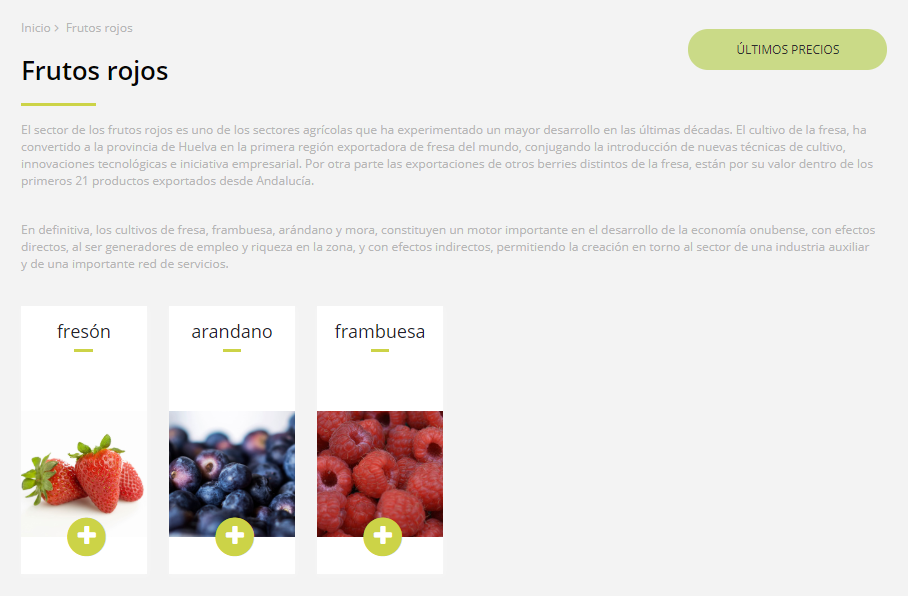

In [1]:
from IPython.display import Image
Image("Data/Website.png")

## Import and cleanance

In [108]:
import pandas as pd
import datetime
pd.set_option('display.max_columns',None) ## Display all columns in pandas dataframe  
pd.set_option('display.max_rows',None) ## Display all rows in pandas dataframe 

sheet_name = 'Observatorio de Precios'
rows_skip_13 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
rows_skip_14 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
rows_skip_15 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cols = [0,1]
file_names_year = [  
                    ['Data/ArandanoPreciosAgricultor.xls',sheet_name,rows_skip_15,cols,'PriceProducer','Blueberry',0,25],\
                    ['Data/FrambuesaPreciosAgricultor.xls',sheet_name,rows_skip_15,cols,'PriceProducer','Raspberry',35,25],\
                    ['Data/FresaPreciosAgricultor.xls',sheet_name,rows_skip_15,cols,'PriceProducer','Strawberry',48,22]\
                  ]

price = pd.DataFrame()
price = pd.read_excel(file_names_year[0][0]\
                               ,sheet_name = file_names_year[0][1]\
                               ,header = 6\
                               ,skiprows = file_names_year[0][2]\
                               ,usecols = file_names_year[0][3])
price.columns = ['Week',file_names_year[0][4]]
#price['Crop'] = file_names_year[0][5]
price[['Week_No','Year']] = price.Week.str.split(pat='-',expand=True)
price['Week_No'] = price['Week_No'].astype('int32')
price['Year'] = price['Year'].astype('int32')
price.drop_duplicates(inplace=True)
price['Crop'] = file_names_year[0][5]
price['Week_Campaign'] = price['Week_No'].apply(lambda x: (x - file_names_year[0][6] + 53) % 53 )
price['Week_Campaign'] = price['Week_Campaign'].astype('int32')
price['Year_Campaign'] = price['Week_No'].apply(lambda x : 0 if 0 == file_names_year[0][6] else 0 if x < file_names_year[0][6] else 1)
price['Year_Campaign'] = price['Year_Campaign'].astype('int32')
#price['Year_Campaign'] = price_excel['Year_Campaign'] + price_excel['Year'] 
price.to_excel(f'./Results/Price_Excel{file_names_year[0][5]}.xlsx')

for i in range(1,len(file_names_year)):
    price_excel=pd.read_excel(file_names_year[i][0]\
                               ,sheet_name=file_names_year[i][1]\
                               ,header=6\
                               ,skiprows=file_names_year[i][2]\
                               ,usecols=file_names_year[i][3])
    price_excel.columns = ['Week',file_names_year[i][4]]
    price_excel[['Week_No','Year']] = price_excel.Week.str.split(pat='-',expand=True)
    price_excel['Week_No'] = price_excel['Week_No'].astype('int32')
    price_excel['Year'] = price_excel['Year'].astype('int32')
    price_excel.drop_duplicates(inplace=True)
    price_excel['Crop'] = file_names_year[i][5]
    price_excel['Week_Campaign'] = price_excel['Week_No'].apply(lambda x: (x - file_names_year[i][6] + 53) % 53 )
    price_excel['Week_Campaign'] = price_excel['Week_Campaign'].astype('int32')
    price_excel['Year_Campaign'] = price_excel['Week_No'].apply(lambda x : 0 if 0 == file_names_year[i][6] else 0 if x < file_names_year[i][6] else 1)
    price_excel['Year_Campaign'] = price_excel['Year_Campaign'].astype('int32')
    price_excel['Year_Campaign'] = price_excel['Year_Campaign'] + price_excel['Year'] 
    price = price.append(price_excel)
    price_excel.to_excel(f'./Results/Price_Excel{file_names_year[i][5]}.xlsx')
    price_excel[price_excel['Crop']==file_names_year[i][5]].groupby(['Year_Campaign'])['PriceProducer'].describe().transpose().to_excel(f'./Results/summary_{file_names_year[i][5]}.xlsx')
        
price['Year_Campaign'] = price['Year_Campaign'] + price['Year']
price['Date_Ref']=price['Week'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%V-%G-%u') )
price.drop(range(0,price.PriceProducer.notna().idxmax()),inplace=True)
price = price [['Crop',\
                'PriceProducer',\
                'Week',\
                'Week_No',\
                'Year',\
                'Date_Ref',\
                'Week_Campaign',\
                'Year_Campaign']]
#Campaign Dates:
    #Strawberry campaign from week 49 to 22
    #Blueberry campaign from week 1 to 25
    #Raspberry campaign from week 36 to 25

In [81]:
price_excel.to_excel('./Results/Price_Excel.xlsx')

## Checks

In [31]:
price.columns

Index(['Crop', 'PriceProducer', 'Week', 'Week_No', 'Year', 'Date_Ref',
       'Week_Campaign', 'Year_Campaign'],
      dtype='object')

In [52]:
price.head()

Crop  PriceProducer    Week  Week_No  Year   Date_Ref  Week_Campaign  \
16  Blueberry       8.427720  5-2017        5  2017 2017-01-30              5   
17  Blueberry       8.499506  6-2017        6  2017 2017-02-06              6   
18  Blueberry       8.776805  7-2017        7  2017 2017-02-13              7   
19  Blueberry       8.678527  8-2017        8  2017 2017-02-20              8   
20  Blueberry       8.535249  9-2017        9  2017 2017-02-27              9   

    Year_Campaign  
16           2017  
17           2017  
18           2017  
19           2017  
20           2017

In [33]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 16 to 185
Data columns (total 8 columns):
Crop             510 non-null object
PriceProducer    315 non-null float64
Week             510 non-null object
Week_No          510 non-null int32
Year             510 non-null int32
Date_Ref         510 non-null datetime64[ns]
Week_Campaign    510 non-null int32
Year_Campaign    510 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(4), object(2)
memory usage: 27.9+ KB


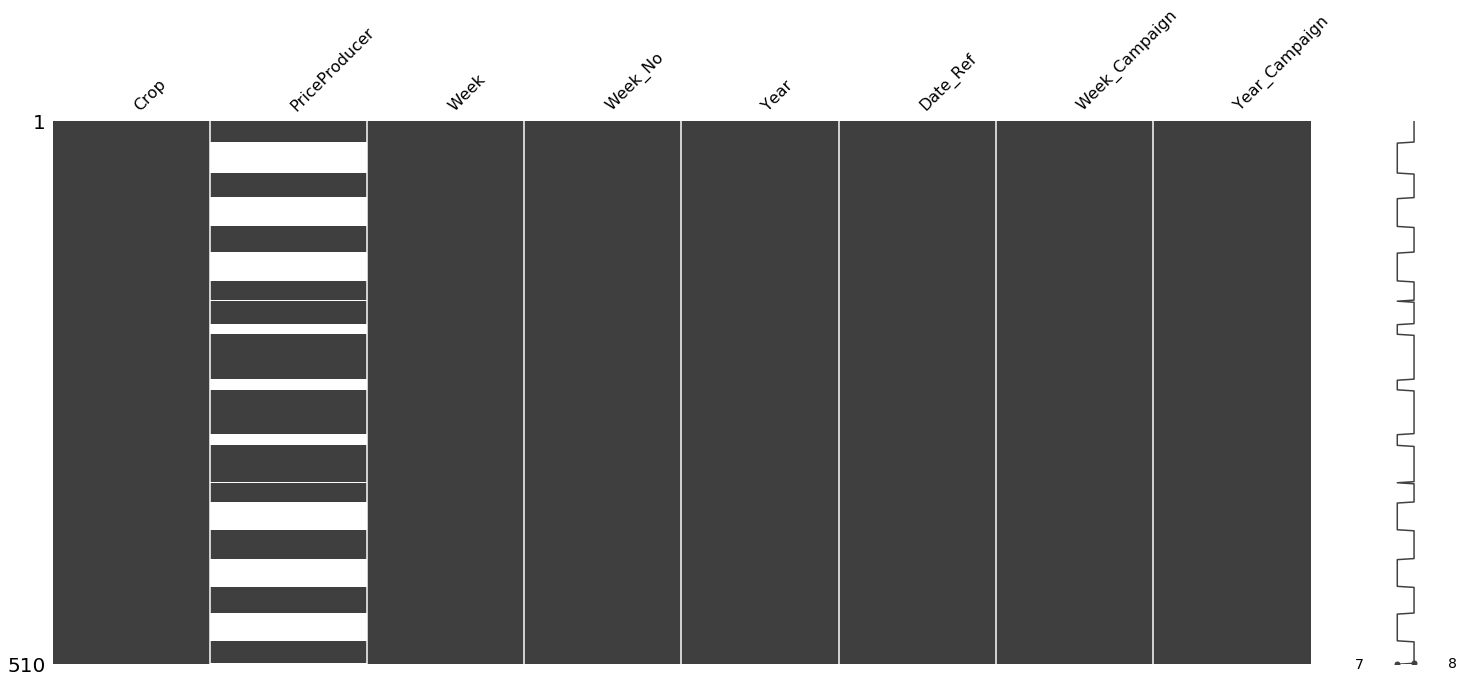

In [34]:
import missingno as msno
msno.matrix(price)

In [35]:
import pandas as pd
price.isnull().sum()

Crop               0
PriceProducer    195
Week               0
Week_No            0
Year               0
Date_Ref           0
Week_Campaign      0
Year_Campaign      0
dtype: int64

In [36]:
price['Week_No'][(price['PriceProducer'].isna()) & (price['Crop']=='Raspberry')].value_counts().reset_index().sort_values(by='index')

index  Week_No
11     18        1
10     25        1
5      26        3
4      27        3
3      28        3
2      29        3
1      30        3
0      31        3
9      32        3
8      33        3
7      34        3
6      35        3

## Plotting

#### Summary

In [37]:
for i in range(0,len(file_names_year)):
    crop = file_names_year[i][5] 
    summary=(price[(price['Year']>2016) & (price['Crop']==crop)][['Year_Campaign','PriceProducer']].groupby('Year_Campaign')\
                .describe().unstack(1)).to_frame('Value')\
                .reset_index().sort_values('Year_Campaign')
    del summary['level_0']
    summary=summary.pivot_table(index='level_1',columns='Year_Campaign',values='Value',aggfunc='sum')
    summary.reset_index(inplace=True)
    summary.to_excel('./Plots/Summary_'+ crop +'.xlsx')

#### Distribution

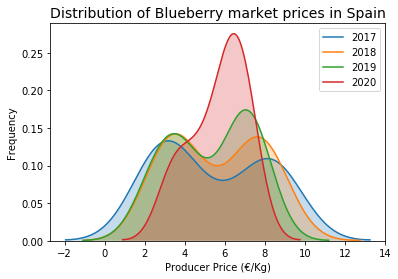

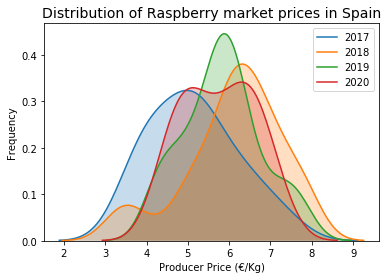

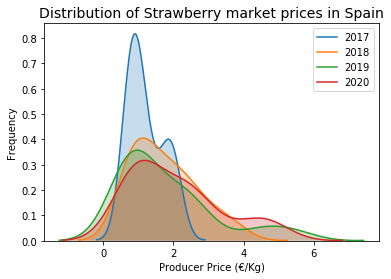

In [38]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

for i in range(0,len(file_names_year)):
    crop = file_names_year[i][5]
    ax = sns.kdeplot(price[(price['Year_Campaign']==2017) & (price['Crop'] == crop)]['PriceProducer'].dropna(),label='2017', shade=True)
    ax = sns.kdeplot(price[(price['Year_Campaign']==2018) & (price['Crop'] == crop)]['PriceProducer'].dropna(),label='2018', shade=True)
    ax = sns.kdeplot(price[(price['Year_Campaign']==2019) & (price['Crop'] == crop)]['PriceProducer'].dropna(),label='2019', shade=True)
    ax = sns.kdeplot(price[(price['Year_Campaign']==2020) & (price['Crop'] == crop)]['PriceProducer'].dropna(),label='2020', shade=True)
    plt.title('Distribution of ' + crop + ' market prices in Spain', fontsize=14)
    plt.xlabel('Producer Price (€/Kg)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Plots/Distribution_' + crop + '.png')
    plt.show()

#### Boxplot

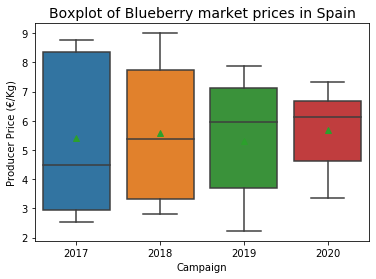

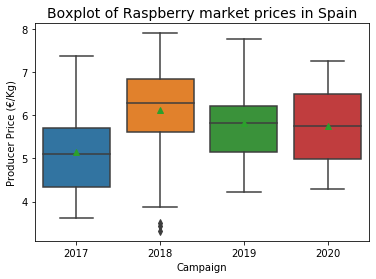

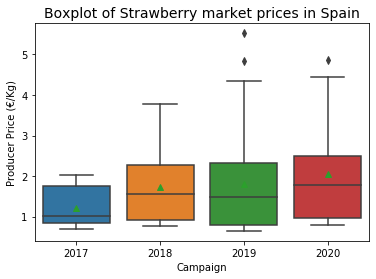

In [39]:
for i in range(0,len(file_names_year)):
    crop = file_names_year[i][5]
    ax = sns.boxplot(x="Year_Campaign", y="PriceProducer", \
                 data=price[(price['Crop']==crop) & (price['Year_Campaign'].isin(['2017','2018','2019','2020']))], showmeans=True)
    plt.title('Boxplot of ' + crop + ' market prices in Spain', fontsize=14)
    plt.xlabel('Campaign', fontsize=10)
    plt.ylabel('Producer Price (€/Kg)', fontsize=10)
    plt.savefig('./Plots/Boxplot_' + crop + '.png')
    plt.show()

#### Evolution

In [40]:
price.head()

Crop  PriceProducer    Week  Week_No  Year   Date_Ref  Week_Campaign  \
16  Blueberry       8.427720  5-2017        5  2017 2017-01-30              5   
17  Blueberry       8.499506  6-2017        6  2017 2017-02-06              6   
18  Blueberry       8.776805  7-2017        7  2017 2017-02-13              7   
19  Blueberry       8.678527  8-2017        8  2017 2017-02-20              8   
20  Blueberry       8.535249  9-2017        9  2017 2017-02-27              9   

    Year_Campaign  
16           2017  
17           2017  
18           2017  
19           2017  
20           2017

In [41]:
price.drop(price[(price['Crop']=='Blueberry')&(price['Week_No']==52)].index,inplace=True)

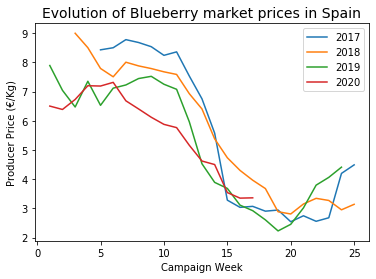

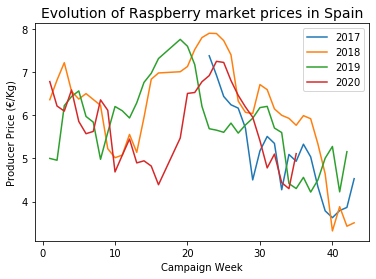

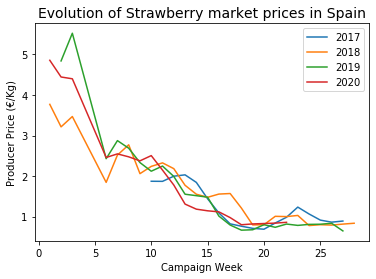

In [42]:
for i in range(0,len(file_names_year)):
    crop = file_names_year[i][5]
    for i in range(2017, 2021):
        data_graph = price[(price['Crop']==crop) & (price['Year_Campaign']==i)][['PriceProducer','Week_Campaign']]
        ax = sns.lineplot(x='Week_Campaign',y='PriceProducer',data=data_graph, label=i)
        
        
    plt.title('Evolution of ' + crop + ' market prices in Spain', fontsize=14)
    plt.xlabel('Campaign Week', fontsize=10)
    plt.ylabel('Producer Price (€/Kg)', fontsize=10)
    plt.savefig('./Plots/Evolution_' + crop + '.png')
    plt.show()

In [43]:
price.groupby(['Crop','Year'])['Week_No'].agg('max')

Crop        Year
Blueberry   2017    51
            2018    51
            2019    51
            2020    18
Raspberry   2017    51
            2018    51
            2019    51
            2020    18
Strawberry  2017    51
            2018    51
            2019    51
            2020    18
Name: Week_No, dtype: int32

In [44]:
price[price['Week_Campaign']==1][['Crop','Year_Campaign','Date_Ref']]

Crop  Year_Campaign   Date_Ref
64    Blueberry           2018 2018-01-01
116   Blueberry           2019 2018-12-31
168   Blueberry           2020 2019-12-30
47    Raspberry           2018 2017-09-04
99    Raspberry           2019 2018-09-03
151   Raspberry           2020 2019-09-02
60   Strawberry           2018 2017-12-04
112  Strawberry           2019 2018-12-03
164  Strawberry           2020 2019-12-02

In [45]:
price[(price['Crop']=='Blueberry') & (price['Week_No'] == 10)]

Crop  PriceProducer     Week  Week_No  Year   Date_Ref  \
21   Blueberry       8.238942  10-2017       10  2017 2017-03-06   
73   Blueberry       7.674932  10-2018       10  2018 2018-03-05   
125  Blueberry       7.249526  10-2019       10  2019 2019-03-04   
177  Blueberry       5.875832  10-2020       10  2020 2020-03-02   

     Week_Campaign  Year_Campaign  
21              10           2017  
73              10           2018  
125             10           2019  
177             10           2020

In [46]:
price[price['Crop']=='Raspberry'].tail(100)

Crop  PriceProducer     Week  Week_No  Year   Date_Ref  \
84   Raspberry       4.641517  21-2018       21  2018 2018-05-21   
85   Raspberry       3.322371  22-2018       22  2018 2018-05-28   
86   Raspberry       3.883449  23-2018       23  2018 2018-06-04   
87   Raspberry       3.431054  24-2018       24  2018 2018-06-11   
88   Raspberry       3.510335  25-2018       25  2018 2018-06-18   
89   Raspberry            NaN  26-2018       26  2018 2018-06-25   
90   Raspberry            NaN  27-2018       27  2018 2018-07-02   
91   Raspberry            NaN  28-2018       28  2018 2018-07-09   
92   Raspberry            NaN  29-2018       29  2018 2018-07-16   
93   Raspberry            NaN  30-2018       30  2018 2018-07-23   
94   Raspberry            NaN  31-2018       31  2018 2018-07-30   
95   Raspberry            NaN  32-2018       32  2018 2018-08-06   
96   Raspberry            NaN  33-2018       33  2018 2018-08-13   
97   Raspberry            NaN  34-2018       34  2018 2018-08-20   
98   Raspberry            NaN  35-2018       35  2018 2018-08-27   
99   Raspberry       4.999494  36-2018       36  2018 2018-09-03   
100  Raspberry       4.957741  37-2018       37  2018 2018-09-10   
101  Raspberry       6.219868  38-2018       38  2018 2018-09-17   
102  Raspberry       6.431370  39-2018       39  2018 2018-09-24   
103  Raspberry       6.561420  40-2018       40  2018 2018-10-01   
104  Raspberry       5.970471  41-2018       41  2018 2018-10-08   
105  Raspberry       5.838999  42-2018       42  2018 2018-10-15   
106  Raspberry       4.978945  43-2018       43  2018 2018-10-22   
107  Raspberry       5.601965  44-2018       44  2018 2018-10-29   
108  Raspberry       6.200579  45-2018       45  2018 2018-11-05   
109  Raspberry       6.102623  46-2018       46  2018 2018-11-12   
110  Raspberry       5.935458  47-2018       47  2018 2018-11-19   
111  Raspberry       6.286667  48-2018       48  2018 2018-11-26   
112  Raspberry       6.758861  49-2018       49  2018 2018-12-03   
113  Raspberry       6.969203  50-2018       50  2018 2018-12-10   
114  Raspberry       7.310235  51-2018       51  2018 2018-12-17   
116  Raspberry       7.754257   1-2019        1  2019 2018-12-31   
117  Raspberry       7.594393   2-2019        2  2019 2019-01-07   
118  Raspberry       7.170882   3-2019        3  2019 2019-01-14   
119  Raspberry       6.202321   4-2019        4  2019 2019-01-21   
120  Raspberry       5.686718   5-2019        5  2019 2019-01-28   
121  Raspberry       5.653433   6-2019        6  2019 2019-02-04   
122  Raspberry       5.604096   7-2019        7  2019 2019-02-11   
123  Raspberry       5.816603   8-2019        8  2019 2019-02-18   
124  Raspberry       5.585805   9-2019        9  2019 2019-02-25   
125  Raspberry       5.773768  10-2019       10  2019 2019-03-04   
126  Raspberry       5.929492  11-2019       11  2019 2019-03-11   
127  Raspberry       6.175377  12-2019       12  2019 2019-03-18   
128  Raspberry       6.203657  13-2019       13  2019 2019-03-25   
129  Raspberry       5.702252  14-2019       14  2019 2019-04-01   
130  Raspberry       5.598500  15-2019       15  2019 2019-04-08   
131  Raspberry       4.418685  16-2019       16  2019 2019-04-15   
132  Raspberry       4.302783  17-2019       17  2019 2019-04-22   
133  Raspberry       4.561290  18-2019       18  2019 2019-04-29   
134  Raspberry       4.220877  19-2019       19  2019 2019-05-06   
135  Raspberry       4.502505  20-2019       20  2019 2019-05-13   
136  Raspberry       5.004820  21-2019       21  2019 2019-05-20   
137  Raspberry       5.276082  22-2019       22  2019 2019-05-27   
138  Raspberry       4.226556  23-2019       23  2019 2019-06-03   
139  Raspberry       5.155529  24-2019       24  2019 2019-06-10   
140  Raspberry            NaN  25-2019       25  2019 2019-06-17   
141  Raspberry            NaN  26-2019       26  2019 2019-06-24   
142  Raspberry            NaN  27-2019       27  2019 2019-07-01  